# Scraping Team Seas Data for analysis

In [1]:
import requests
import pandas
from bs4 import BeautifulSoup
from datetime import datetime
import matplotlib.pyplot as plt
import locale

In [2]:
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 
headers = {"User-Agent": "Mozilla/5.0"}
# r = requests.get("https://teamseas.org/all-donors/", headers=headers)
r = requests.get("https://tscache.com/lb_recent.json")
# soup = BeautifulSoup(r.content, "html.parser")
donations = r.json()

In [3]:
donations.keys()

dict_keys(['recent', 'teams', 'most', 'config', 'teams_alpha', 'teams_most_donations'])

In [4]:
donations["recent"]

[{'ff': 0,
  'name': 'Layla Bullock',
  'team_name': '',
  'message_public': '',
  'flair': 'feed-icon-1.png',
  'pounds': '5',
  'pounds_color': 'FFB72B',
  'created_at': 1638451400,
  'is_gift': 0},
 {'ff': 0,
  'name': 'Anonymous',
  'team_name': '',
  'message_public': '',
  'flair': 'feed-icon-2.png',
  'pounds': '20',
  'pounds_color': 'FFB72B',
  'created_at': 1638451348,
  'is_gift': 0},
 {'ff': 0,
  'name': 'Mordi Slavin',
  'team_name': 'The Slavinator',
  'message_public': 'Blue Seas',
  'flair': 'feed-icon-4.png',
  'pounds': '105',
  'pounds_color': 'FFB72B',
  'created_at': 1638451316,
  'is_gift': 0},
 {'ff': 0,
  'name': 'Truong Van Nhat Truong',
  'team_name': 'Comm 101',
  'message_public': "I'm doing this for the COMN final presentation",
  'flair': 'feed-icon-2.png',
  'pounds': '20',
  'pounds_color': 'FFB72B',
  'created_at': 1638451261,
  'is_gift': 0},
 {'ff': 0,
  'name': 'AA',
  'team_name': '',
  'message_public': '',
  'flair': 'feed-icon-1.png',
  'pounds':

In [20]:
df_li = []
for recents in donations["recent"]:
    d = {}
    d["name"] = recents["name"]
    if recents["team_name"]:
        d["team_name"] = recents["team_name"]
    else:
        d["team_name"] = "Anonymous"
    d["created"] = datetime.strptime(datetime.utcfromtimestamp(int(recents["created_at"])).strftime('%Y-%m-%d %H:%M:%S'), '%Y-%m-%d %H:%M:%S')
    d["amount"] = locale.atoi(recents["pounds"])
    df_li.append(d)
df_li

TypeError: list indices must be integers or slices, not str

In [25]:
df = pandas.DataFrame(df_li)
df["created"][0].strftime("%Y-%m-%d %H:%M:%S")

'2021-12-02 13:23:20'

## Plot of Donations vs Time

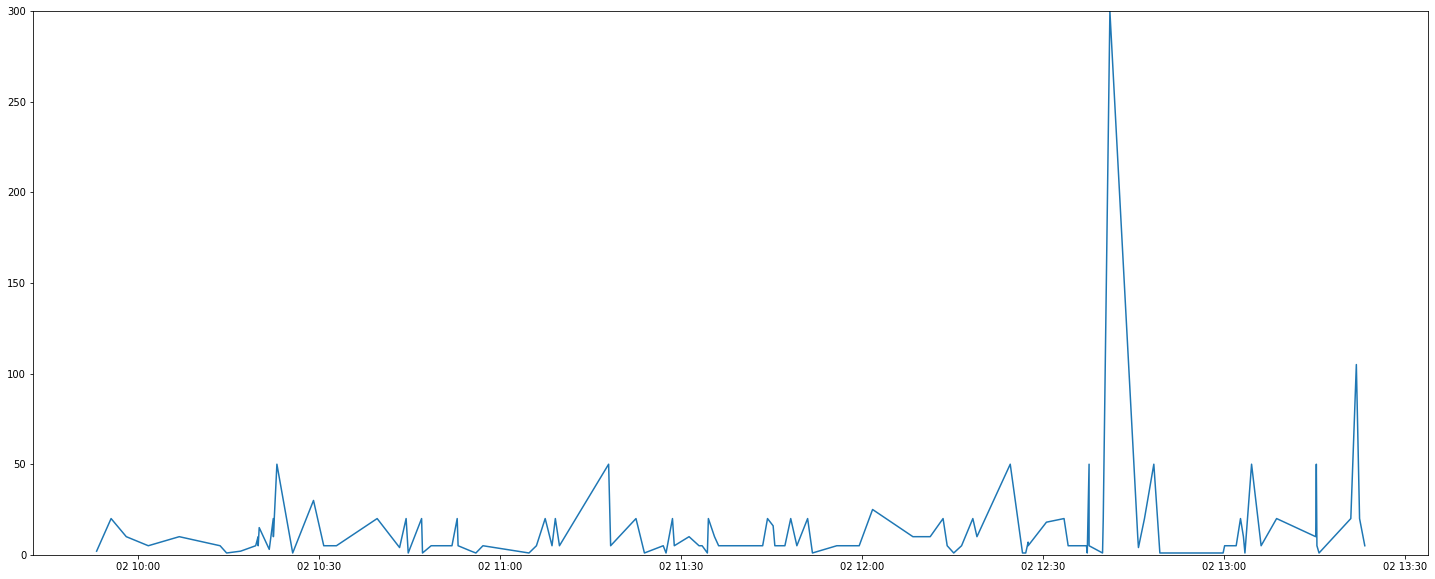

In [7]:
plt.figure(figsize=(25, 10))
# plt.yticks(range(min(df["amount"]), max(df["amount"])))
plt.ylim(0, df["amount"].max())
plt.plot(df["created"], df["amount"])

## Grouping according to teams

In [8]:
grouped_data = df.groupby(df["team_name"])["amount"].sum()
grouped_data

team_name
Alberti                     1
Alv                         5
Anonymous                1398
Comm 101                   20
From Russia                 5
Iker                       10
India                       5
JOLLY                       5
JSAL                        1
MrBeast                    20
Rad reptile 2 MrBeast      50
Serenity                    5
Shahan Noor                 5
Tabitha                     1
Team Conor                 20
Team Navarro               20
TeamBees                    5
The High GC                 1
The Slavinator            105
amogus                      3
for nature                  1
rudekwiatki                 1
Name: amount, dtype: int64

In [19]:
teams_df = pandas.DataFrame({"team_name": grouped_data.index, "total_donated": grouped_data.values})
teams_df

,team_name,total_donated
0,Alberti,1
1,Alv,5
2,Anonymous,1398
3,Comm 101,20
4,From Russia,5
5,Iker,10
6,India,5
7,JOLLY,5
8,JSAL,1
9,MrBeast,20


In [10]:
teams_df.sort_values(by=["total_donated"], ascending=False, inplace=True)

([<matplotlib.patches.Wedge at 0x1c81b9fa190>,
 [Text(-0.7843494628715759, 0.7712301343263699, 'Anonymous'),
  Text(0.13789048886189573, -1.0913231478720808, 'Params'),
  Text(0.3702796251475605, -1.0358054832837014, 'Avula'),
  Text(0.5851992374790557, -0.9314192678133366, 'DjDESIGN Inc.'),
  Text(0.7725095745418156, -0.7830893673401672, 'Skinkeklanen'),
  Text(0.8894964586430008, -0.6471445356808327, 'Team Brodie'),
  Text(0.9515288831646412, -0.5518992521316284, 'MrBeast'),
  Text(0.9881540542290053, -0.4832717300968269, 'MarkRober'),
  Text(1.0082470426654038, -0.439815757967433, 'Team Baird'),
  Text(1.0264300698171986, -0.3955266258737343, 'Chaddest Chads'),
  Text(1.0426686908743108, -0.3504882324279252, 'Pendragon Esports'),
  Text(1.0569321443901678, -0.30478589559689556, 'WrekTheTrash'),
  Text(1.0691934105543002, -0.25850619108111134, 'Ernest Ameyaw'),
  Text(1.0784974035196317, -0.21643324744921424, "That one dude's"),
  Text(1.0841884648859978, -0.18583695167577366, 'THM-E

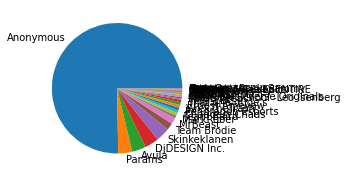

In [11]:
plt.figure(figsize=(25, 3))
plt.pie(teams_df["total_donated"], labels=teams_df["team_name"])

## Hourly Average

In [12]:
df["hour"] = df["created"].dt.strftime("%H")
df

,name,team_name,created,amount,hour
0,Elias37145,Anonymous,2021-12-01 14:54:38,20,14
1,Gabriel Garnett,Anonymous,2021-12-01 14:53:30,20,14
2,Anonymous,Anonymous,2021-12-01 14:52:59,2,14
3,Stu,Anonymous,2021-12-01 14:52:45,20,14
4,Florian,MRBEAST,2021-12-01 14:52:41,5,14
...,...,...,...,...,...
115,CP & CJ,Anonymous,2021-12-01 12:10:42,20,12
116,GPMPlayz,CAMP Music,2021-12-01 12:09:46,4,12
117,Kingston,Anonymous,2021-12-01 12:09:14,10,12
118,Anonymous,Anonymous,2021-12-01 12:07:24,5,12


In [13]:
hourly_grp = df.groupby(df["hour"])["amount"].sum()
hourly_grp

hour
12     878
13     831
14    1178
Name: amount, dtype: int64

In [14]:
hourly_df = pandas.DataFrame({"hour": hourly_grp.index, "total_donation": hourly_grp.values })
hourly_df

,hour,total_donation
0,12,878
1,13,831
2,14,1178


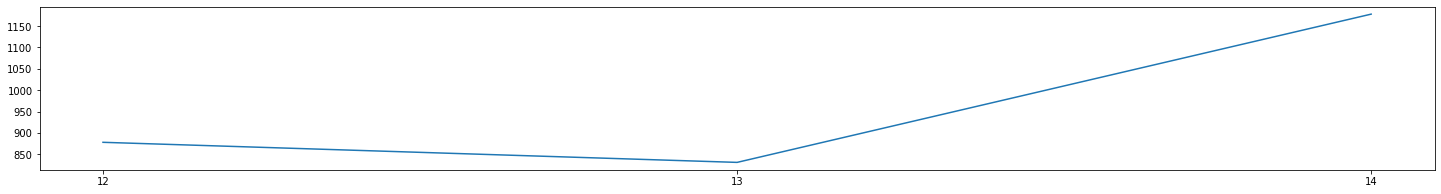

In [15]:
plt.figure(figsize=(25, 3))
plt.plot(hourly_df["hour"], hourly_df["total_donation"])

## Minute Average 

In [16]:
df["minute"] = df["created"].dt.strftime("%H-%M")
df

,name,team_name,created,amount,hour,minute
0,Elias37145,Anonymous,2021-12-01 14:54:38,20,14,14-54
1,Gabriel Garnett,Anonymous,2021-12-01 14:53:30,20,14,14-53
2,Anonymous,Anonymous,2021-12-01 14:52:59,2,14,14-52
3,Stu,Anonymous,2021-12-01 14:52:45,20,14,14-52
4,Florian,MRBEAST,2021-12-01 14:52:41,5,14,14-52
...,...,...,...,...,...,...
115,CP & CJ,Anonymous,2021-12-01 12:10:42,20,12,12-10
116,GPMPlayz,CAMP Music,2021-12-01 12:09:46,4,12,12-09
117,Kingston,Anonymous,2021-12-01 12:09:14,10,12,12-09
118,Anonymous,Anonymous,2021-12-01 12:07:24,5,12,12-07


In [17]:
minute_grp = df.groupby(df["minute"])["amount"].sum()
minute_grp

minute
12-06    100
12-07      5
12-09     14
12-10     40
12-11     25
        ... 
14-49      3
14-51      1
14-52     27
14-53     20
14-54     20
Name: amount, Length: 85, dtype: int64

In [18]:
minute_df = pandas.DataFrame({"minute": minute_grp.index, "total_donation": minute_grp.values})
minute_df

,minute,total_donation
0,12-06,100
1,12-07,5
2,12-09,14
3,12-10,40
4,12-11,25
...,...,...
80,14-49,3
81,14-51,1
82,14-52,27
83,14-53,20


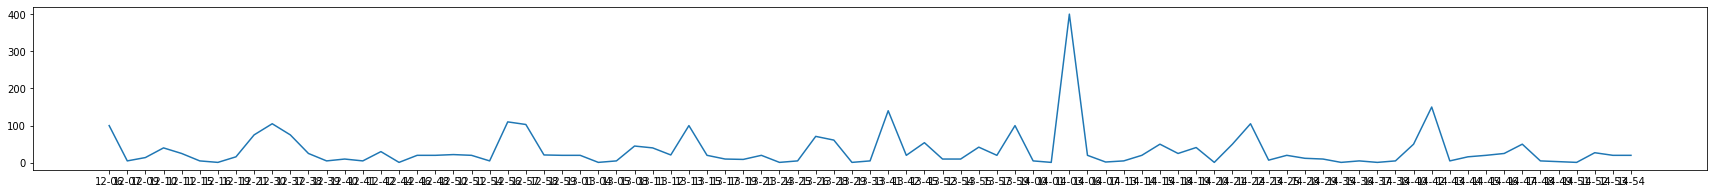

In [19]:
plt.figure(figsize=(30, 3))
plt.plot(minute_df["minute"], minute_df["total_donation"])